<a href="https://colab.research.google.com/github/agungfradiansyah12/MesingLearning/blob/main/jb5MesinLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

## Langkah 0 - Download Dataset

## Langkah 1 - Import Library

In [1]:
# Import required library
import pandas as pd              # Library untuk manipulasi dan analisis data (dataframe, csv, dll)
import numpy as np               # Library untuk perhitungan numerik dan operasi array
import matplotlib.pyplot as plt  # Library untuk visualisasi data (grafik, chart)
from sklearn.cluster import KMeans  # Modul dari scikit-learn untuk algoritma clustering K-Means

## Langkah 2 - Load dan Inspeksi Data

In [3]:
df = pd.read_csv('Iris.csv')  # Membaca file CSV bernama 'Iris.csv' dan menyimpannya ke DataFrame df
df.head()                     # Menampilkan 5 baris pertama dari DataFrame untuk melihat isi data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Langkah 3 - Seleksi Fitur

In [5]:
# Features Selection
X = df.iloc[:, 1:-1]  # Mengambil semua kolom mulai dari indeks 1 sampai sebelum kolom terakhir (fitur: sepal & petal)
y = df.iloc[:, -1]    # Mengambil kolom terakhir sebagai label (species), tapi tidak dipakai untuk clustering

In [6]:
print(X.head())  # Menampilkan 5 baris pertama dari data fitur (X) untuk memastikan kolom yang dipilih sudah benar

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


## Langkah 4 - Plotting

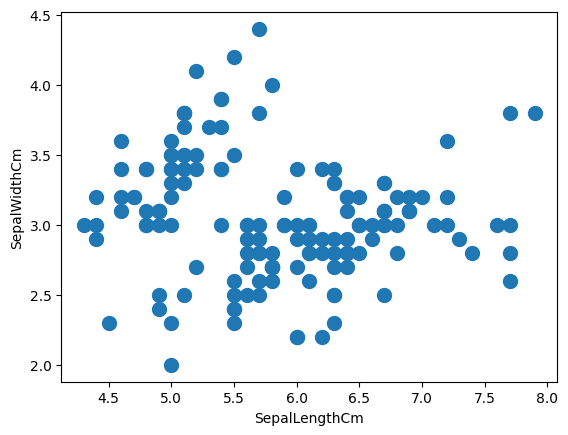

In [8]:
# Make a scatterplot using
# SepalLengthCm and SepalWidthCm
plt.xlabel('SepalLengthCm')                 # Memberi label pada sumbu X
plt.ylabel('SepalWidthCm')                  # Memberi label pada sumbu Y
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100)  # Membuat scatter plot dengan fitur SepalLengthCm (X) vs SepalWidthCm (Y), ukuran titik 100

## Langkah 5 - Membuat Model K-Means

In [9]:
# Build a K-Means Model
# Based on visual inspection using scatterplot,
# we can assumpt that the data has 2 cluster
# (even though, from the label, there are 3 labels in this data)

from sklearn.cluster import KMeans  # Import class KMeans dari scikit-learn

# Initiate K-Means object with number of cluster is 2
cl_kmeans = KMeans(n_clusters=2)  # Membuat objek KMeans dengan jumlah cluster = 2

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)  # Melatih model KMeans pada data X dan menghasilkan label cluster untuk tiap data

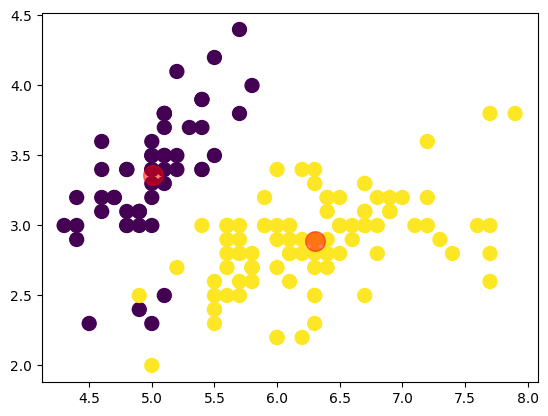

In [10]:
# Plot the clustering result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100, c=y_kmeans)
# Membuat scatter plot hasil clustering, setiap titik diberi warna sesuai cluster hasil prediksi (y_kmeans)

# Plot the centroid
centers = cl_kmeans.cluster_centers_  # Mengambil koordinat pusat (centroid) dari tiap cluster
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
# Menampilkan centroid cluster dengan warna merah, ukuran lebih besar (200), dan transparansi 0.5

## Langkah 6 - Evaluasi Model

In [12]:
# Print SSE value
print(f'Nilai SSE: {cl_kmeans.inertia_}')  # Menampilkan nilai SSE (Sum of Squared Errors) dari model KMeans
                                           # SSE dipakai untuk mengukur seberapa baik data dikelompokkan ke dalam cluster


Nilai SSE: 152.36870647733915


## Langkah 7 - Menentukan kk terbaik dengan Elbow Method

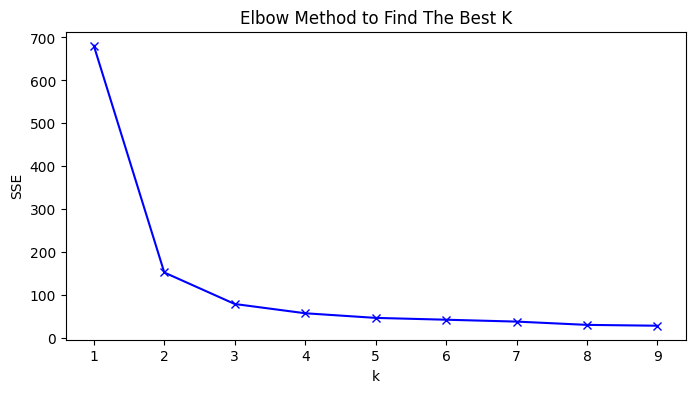

In [13]:
# Find the best k
# using Elbow Method

# List SSE values
sse = []  # List untuk menyimpan nilai SSE tiap jumlah cluster (k)

# Build k range from 1 to 9
K = range(1,10)  # Membuat range nilai k dari 1 sampai 9

# Find the SSE value for each k
for k in K:
    kmeanModel = KMeans(n_clusters=k)  # Membuat model KMeans dengan jumlah cluster = k
    kmeanModel.fit(X)                  # Melatih model dengan data fitur X
    sse.append(kmeanModel.inertia_)    # Menyimpan nilai SSE (inertia) ke list sse

# Plotting the distortions
plt.figure(figsize=(8,4))          # Membuat canvas plot dengan ukuran 8x4
plt.plot(K, sse, "bx-")             # Membuat plot nilai SSE untuk tiap k (dengan garis biru dan tanda x)
plt.xlabel("k")                     # Memberi label sumbu X (jumlah cluster)
plt.ylabel("SSE")                   # Memberi label sumbu Y (nilai SSE)
plt.title("Elbow Method to Find The Best K")  # Judul grafik
plt.show()                          # Menampilkan grafik


# Praktikum 2

## Langkah 0 - Import Library

In [15]:
import matplotlib.pyplot as plt  # Library untuk visualisasi data (plot, grafik, chart)
import seaborn as sns            # Library untuk visualisasi data tingkat lanjut dengan style lebih menarik
import numpy as np               # Library untuk komputasi numerik dan operasi array

## Langkah 1 - Membuat Dataset Sintentis

In [16]:
from sklearn.datasets import make_moons  # Import fungsi untuk membuat dataset berbentuk bulan sabit (moons)

X, y = make_moons(200, noise=.05, random_state=0)
# Membuat dataset sintetis dengan 200 sampel
# noise=.05 → menambahkan sedikit gangguan agar data tidak terlalu rapi
# random_state=0 → memastikan hasil dataset selalu sama setiap kali dijalankan (reproducible)

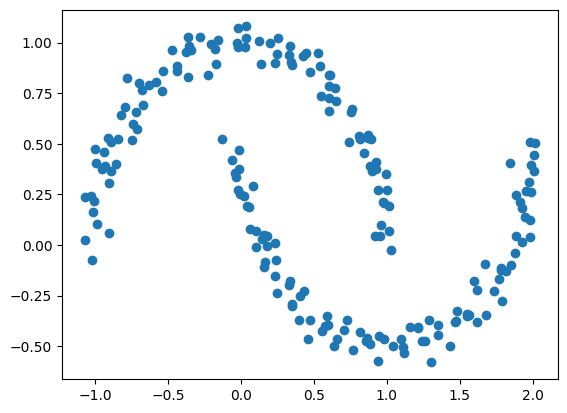

In [17]:
plt.scatter(X[:, 0], X[:, 1])  # Membuat scatter plot dataset moons,
                               # dengan sumbu X = kolom pertama, sumbu Y = kolom kedua

## Langkah 2 - Klasterisasi dengan K-Means

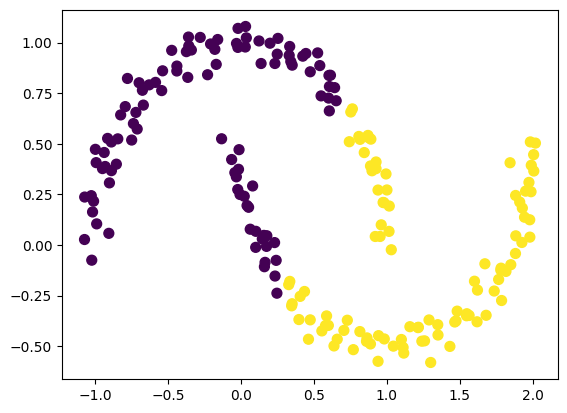

In [19]:
from sklearn.cluster import KMeans  # Import algoritma KMeans untuk clustering

kmeans = KMeans(2, random_state=0)       # Membuat model KMeans dengan jumlah cluster = 2
cluster = kmeans.fit_predict(X)          # Melatih model pada data X dan mengembalikan label cluster untuk tiap titik

plt.scatter(X[:, 0], X[:, 1], c=cluster, s=50, cmap='viridis')
# Membuat scatter plot dengan warna (c) berdasarkan cluster hasil KMeans
# s=50 → ukuran titik 50
# cmap='viridis' → skema warna viridis (gradasi hijau ke kuning)

In [21]:
from sklearn.metrics import silhouette_score  # Import fungsi untuk menghitung Silhouette Score

print(silhouette_score(X, cluster))  # Menghitung dan menampilkan nilai Silhouette Score
                                     # Semakin mendekati 1 → clustering semakin baik
                                     # Mendekati 0 → cluster tumpang tindih
                                     # Negatif → titik lebih dekat ke cluster lain daripada cluster sendiri


0.49215648268306905


## Langkah 3 - Klasterisasi dengan DBSCAN

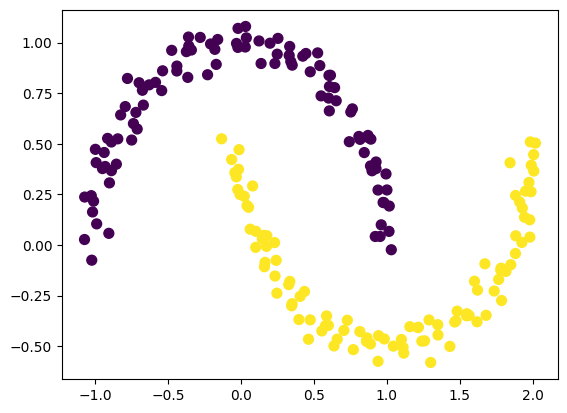

In [23]:
from sklearn.cluster import DBSCAN  # Import algoritma DBSCAN (Density-Based Spatial Clustering)

dbscan = DBSCAN(eps=0.3, min_samples=2)   # Membuat model DBSCAN
                                          # eps=0.3 → jarak maksimum antar titik untuk dianggap tetangga
                                          # min_samples=2 → minimal jumlah titik dalam suatu cluster
cluster_db = dbscan.fit_predict(X)        # Melatih DBSCAN pada data X dan menghasilkan label cluster
                                          # (-1 artinya titik dianggap sebagai noise/outlier)

plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')
# Membuat scatter plot hasil clustering DBSCAN
# Titik diberi warna sesuai cluster (noise ditandai warna berbeda, biasanya -1)
# s=50 → ukuran titik
# cmap='viridis' → skema warna viridis

In [24]:
from sklearn.metrics import silhouette_score  # Import fungsi untuk evaluasi kualitas clustering

print(silhouette_score(X, cluster_db))  # Menghitung Silhouette Score untuk hasil clustering DBSCAN
                                        # Nilai berkisar antara -1 sampai 1
                                        # Semakin tinggi (mendekati 1) → cluster makin baik terpisah
                                        # Hasil di kasus ini: 0.32585318950197517 → kualitas cluster cukup baik

0.32585318950197517


In [26]:
from sklearn.metrics import davies_bouldin_score  # Import fungsi untuk menghitung Davies-Bouldin Index

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(X, cluster_db)  # Menghitung Davies-Bouldin Index dari hasil clustering DBSCAN

print(f"Davies-Bouldin Index: {db}")      # Menampilkan hasil perhitungan DB Index
                                          # Nilai semakin kecil → kualitas clustering semakin baik

# Hasilnya
# Davies-Bouldin Index: 1.1622685374061352

Davies-Bouldin Index: 1.1622685374061352


# Praktikum 3

## Langkah 0 - Import Library

In [27]:
import matplotlib.pyplot as plt  # Library untuk membuat visualisasi (grafik, plot, chart)
import seaborn as sns            # Library visualisasi berbasis matplotlib dengan style lebih rapi dan estetik
import numpy as np               # Library untuk komputasi numerik (array, operasi matematika, dll)

## Langkah 1 - Load Data Citra

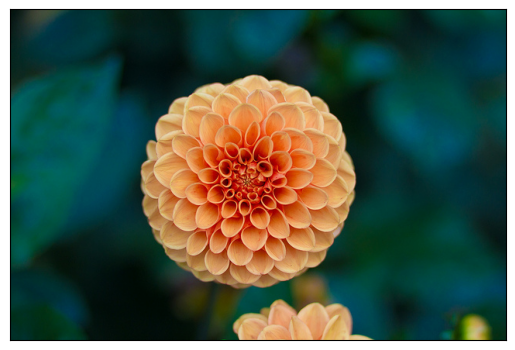

In [32]:
from sklearn.datasets import load_sample_image  # Import fungsi untuk mengambil contoh gambar bawaan sklearn

flower = load_sample_image("flower.jpg")        # Memuat gambar "flower.jpg" sebagai array numpy
ax = plt.axes(xticks=[], yticks=[])             # Membuat axes tanpa menampilkan sumbu X dan Y
ax.imshow(flower)                               # Menampilkan gambar flower


## Langkah 2 - Preprocessing

In [33]:
# Check shape
print(flower.shape)  # Menampilkan dimensi asli gambar: (427, 640, 3) → tinggi 427px, lebar 640px, 3 channel warna (RGB)

# Normalize color
data = flower / 255.0  # Normalisasi nilai piksel dari rentang 0–255 menjadi 0–1 (lebih umum untuk pemrosesan)

# Reshape
data = data.reshape(427 * 640, 3)  # Mengubah array gambar jadi 2D (1D daftar piksel), tiap baris = 1 piksel, 3 kolom = R, G, B

print(data.shape)  # Menampilkan bentuk baru data: (273280, 3) → total piksel (427*640) dengan 3 channel warna

(427, 640, 3)
(273280, 3)


## Langkah 3 - Cek Sebaran Warna

In [34]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data  # Kalau parameter colors tidak diberikan, pakai data (RGB normalisasi) sebagai warna titik

    # choose a random subset
    rng = np.random.RandomState(0)                # Random generator dengan seed 0 (supaya hasil konsisten)
    i = rng.permutation(data.shape[0])[:N]        # Ambil index acak sejumlah N (default 10000 piksel)
    colors = colors[i]                            # Warna piksel acak yang dipilih
    R, G, B = data[i].T                           # Pisahkan channel Red, Green, Blue

    fig, ax = plt.subplots(1, 2, figsize=(16, 6)) # Membuat 2 subplot berdampingan ukuran 16x6

    ax[0].scatter(R, G, color=colors, marker='.') # Scatter plot R vs G, titik diwarnai sesuai RGB
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))  # Label & batas sumbu

    ax[1].scatter(R, B, color=colors, marker='.') # Scatter plot R vs B, titik diwarnai sesuai RGB
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))   # Label & batas sumbu

    fig.suptitle(title, size=20);                 # Judul utama plot

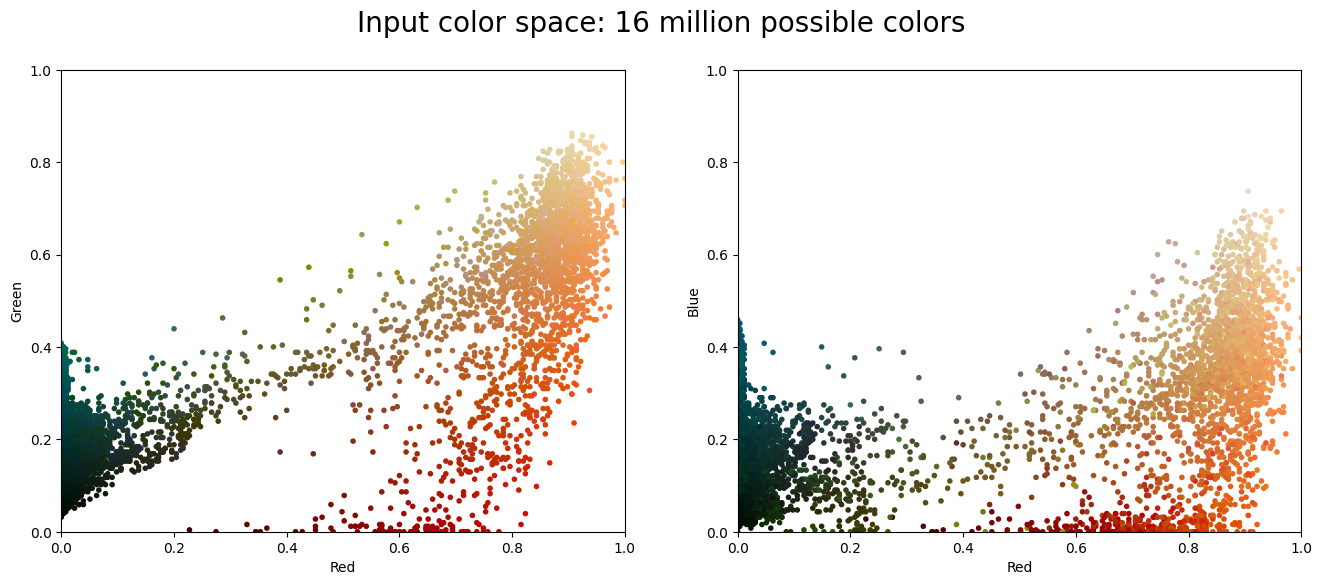

In [35]:
plot_pixels(data, title='Input color space: 16 million possible colors')
# Memanggil fungsi plot_pixels untuk menampilkan sebaran warna pada gambar
# Judul grafik: "Input color space: 16 million possible colors"
# Maksudnya, setiap piksel direpresentasikan dalam ruang warna RGB (hingga 16 juta kombinasi warna)

## Langkah 4 - Klasterisasi Warna

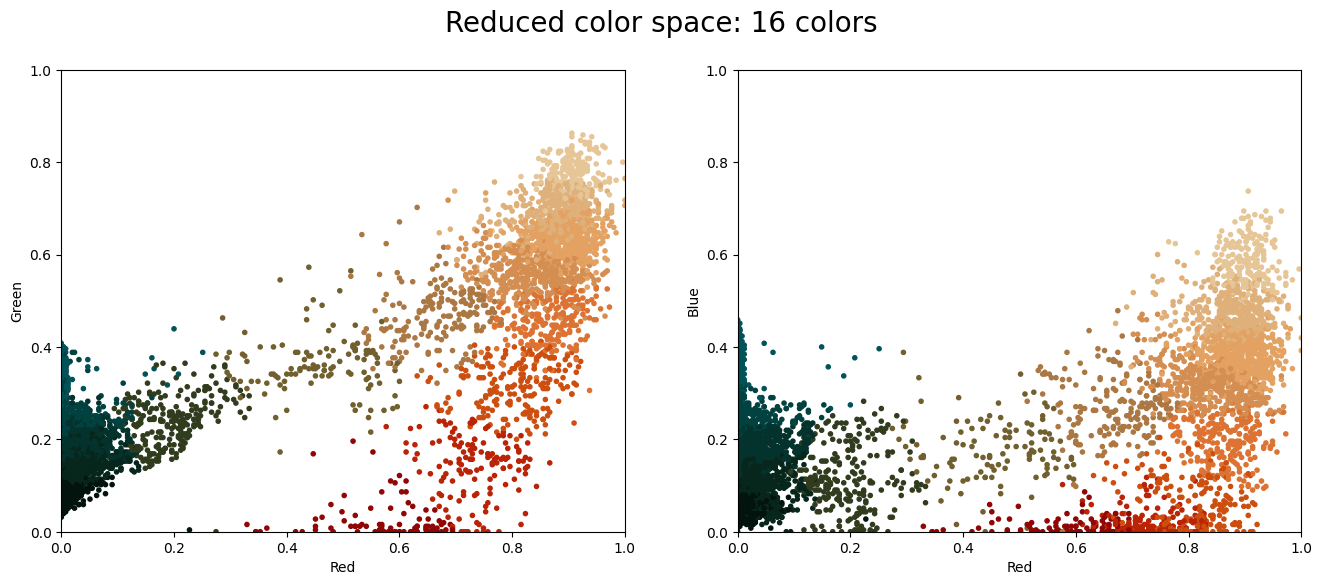

In [36]:
from sklearn.cluster import MiniBatchKMeans  # Import MiniBatchKMeans (lebih cepat dari KMeans biasa untuk dataset besar)

kmeans = MiniBatchKMeans(16)                 # Membuat model MiniBatchKMeans dengan jumlah cluster = 16 (16 warna dominan)
kmeans.fit(data)                             # Melatih model pada data piksel gambar
new_colors = kmeans.cluster_centers_[        # Mengambil warna centroid (16 warna utama)
    kmeans.predict(data)                     # Lalu mengganti tiap piksel dengan warna centroid terdekat
]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")
# Menampilkan sebaran warna baru hasil reduksi menjadi 16 warna dominan

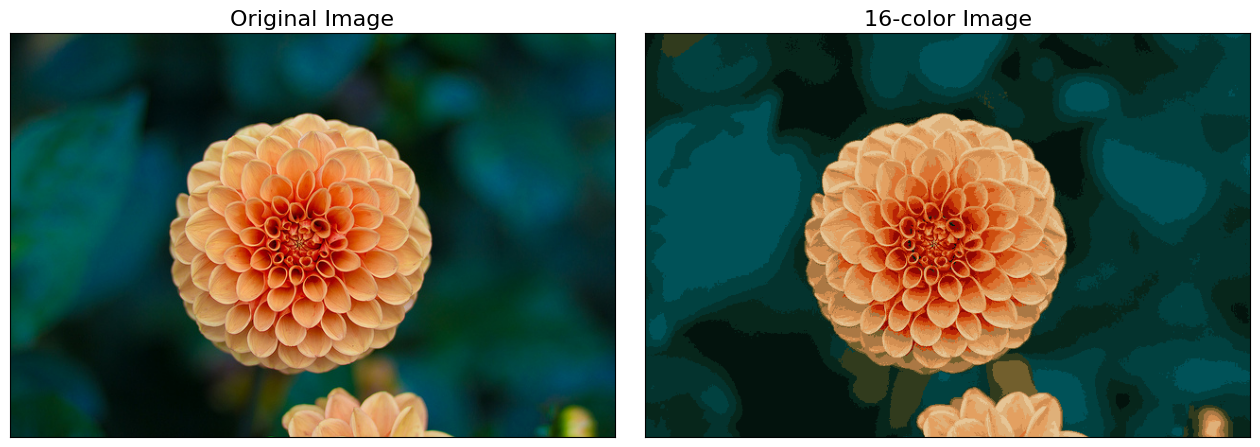

In [37]:
flower_recolored = new_colors.reshape(flower.shape)
# Membentuk ulang array warna baru (hasil clustering) agar sesuai dimensi gambar asli (427x640x3)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),      # Membuat 2 subplot berdampingan ukuran 16x6
                       subplot_kw=dict(xticks=[], yticks=[]))  # Menghilangkan sumbu X dan Y
fig.subplots_adjust(wspace=0.05)                   # Mengatur jarak antar subplot

ax[0].imshow(flower)                               # Menampilkan gambar asli
ax[0].set_title('Original Image', size=16)         # Judul subplot pertama: Original Image

ax[1].imshow(flower_recolored)                     # Menampilkan gambar hasil reduksi 16 warna
ax[1].set_title('16-color Image', size=16);        # Judul subplot kedua: 16-color Image

# Tugas Pratikum

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [40]:
df = pd.read_csv("CC_Customer_Dataset.csv")  # ganti path sesuai lokasi upload
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


## no 2

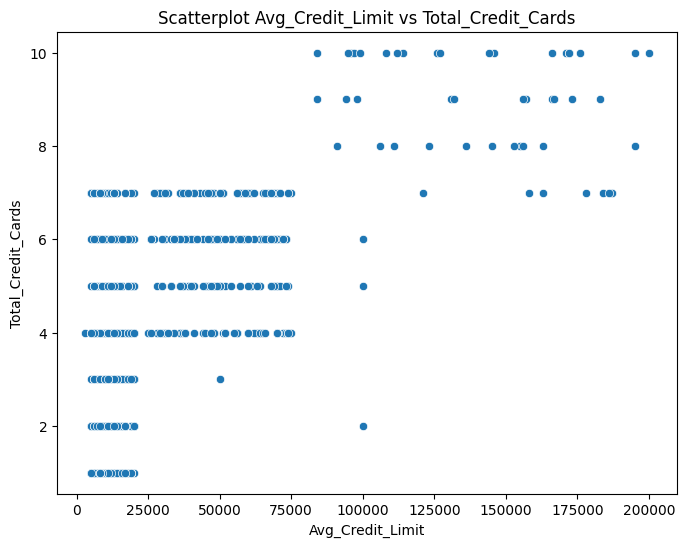

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Avg_Credit_Limit", y="Total_Credit_Cards", data=df)
plt.title("Scatterplot Avg_Credit_Limit vs Total_Credit_Cards")
plt.show()

## no3

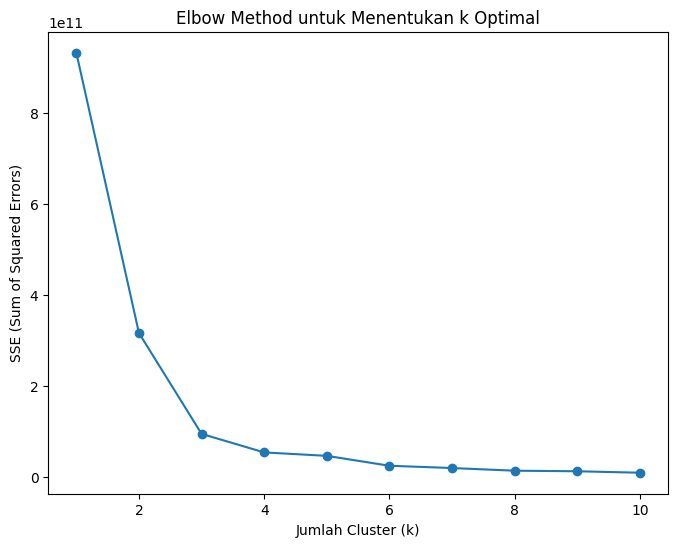

In [42]:
X = df[["Avg_Credit_Limit", "Total_Credit_Cards"]]

sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, sse, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Elbow Method untuk Menentukan k Optimal")
plt.show()

## no 4

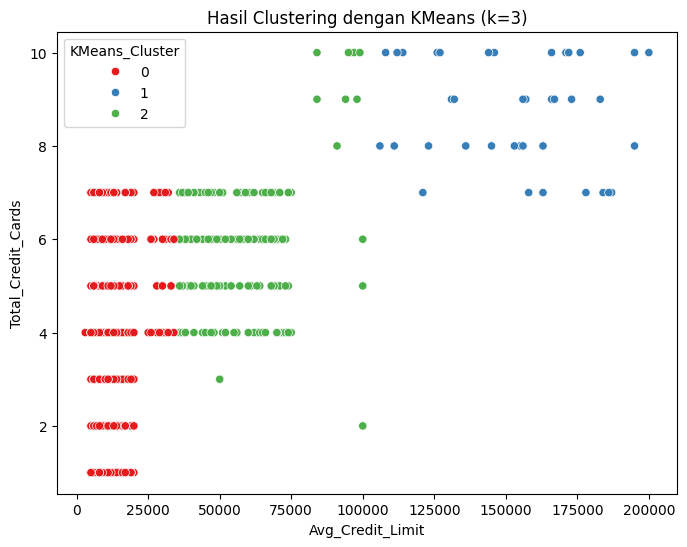

In [43]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x="Avg_Credit_Limit", y="Total_Credit_Cards",
                hue="KMeans_Cluster", palette="Set1", data=df)
plt.title("Hasil Clustering dengan KMeans (k=3)")
plt.show()


## no5

In [44]:
X_all = df[["Avg_Credit_Limit", "Total_Credit_Cards",
            "Total_visits_bank", "Total_visits_online",
            "Total_calls_made"]]

# Standarisasi penting untuk DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

# Model DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # eps bisa disesuaikan
labels = dbscan.fit_predict(X_scaled)

df["DBSCAN_Cluster"] = labels

## no 6

DBSCAN menghasilkan cluster tunggal atau terlalu banyak noise, evaluasi tidak bisa dihitung.


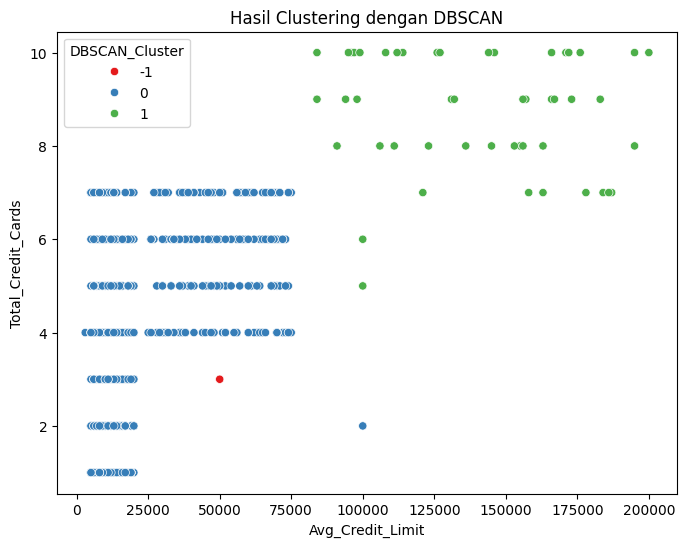

In [45]:
if len(set(labels)) > 1 and -1 not in set(labels):
    sil_score = silhouette_score(X_scaled, labels)
    dbi = davies_bouldin_score(X_scaled, labels)
    print("Silhouette Score DBSCAN:", sil_score)
    print("Davies-Bouldin Index DBSCAN:", dbi)
else:
    print("DBSCAN menghasilkan cluster tunggal atau terlalu banyak noise, evaluasi tidak bisa dihitung.")

# Visualisasi DBSCAN (pakai dua variabel pertama saja untuk scatter)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_all["Avg_Credit_Limit"], y=X_all["Total_Credit_Cards"],
                hue=df["DBSCAN_Cluster"], palette="Set1")
plt.title("Hasil Clustering dengan DBSCAN")
plt.show()